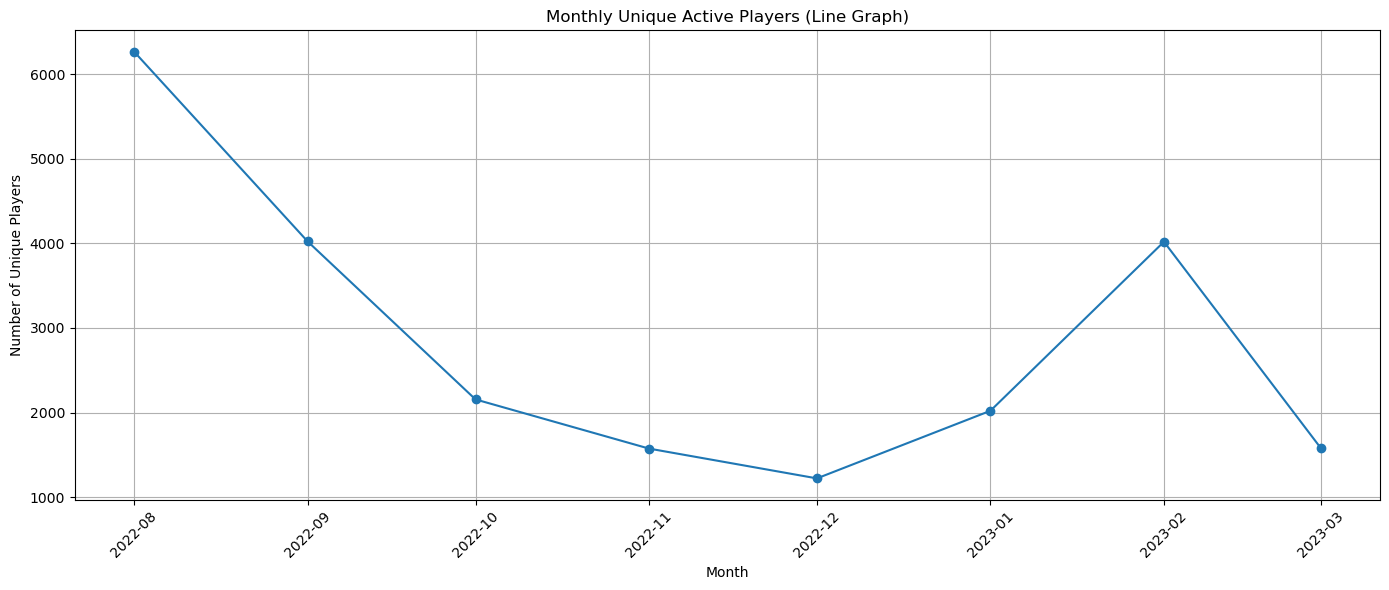

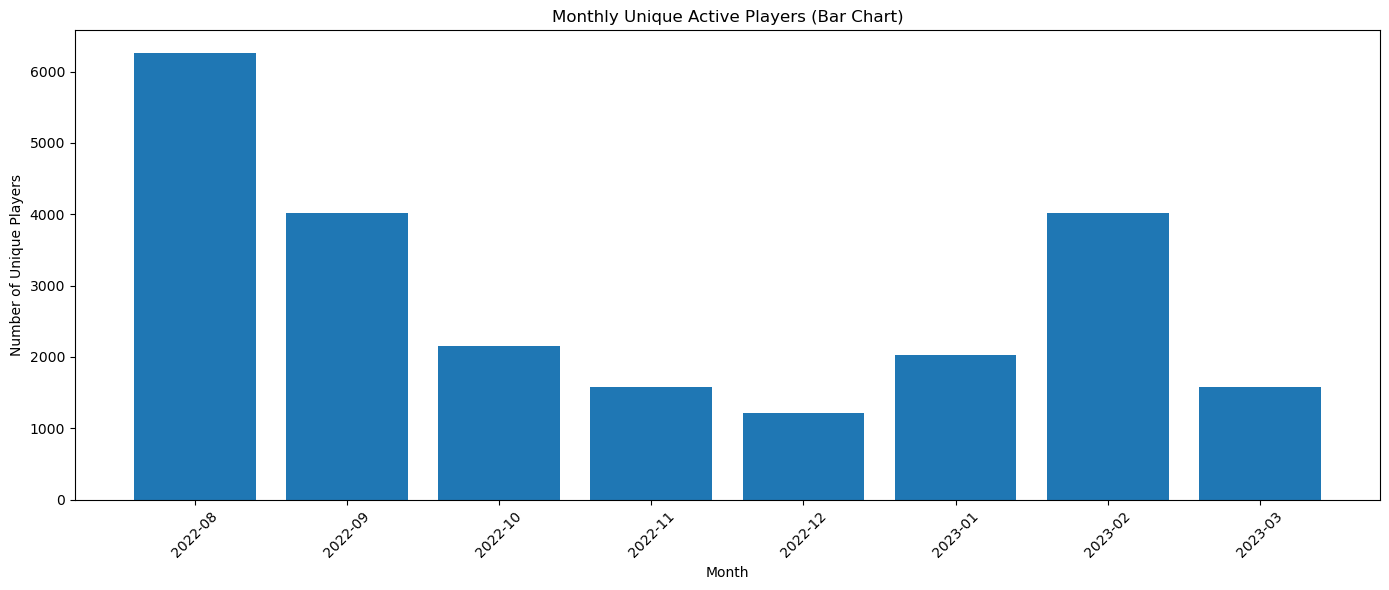

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('data/player_logged_in.csv')

data['Time'] = pd.to_datetime(data['Time'])

#Create a new column for year month period
data['Month'] = data['Time'].dt.to_period('M').astype(str)

#Group by month and count unique players
monthly_active_players = data.groupby('Month')['pid'].nunique().reset_index()
monthly_active_players.columns = ['Month', 'UniqueActivePlayers']
#Sort by month
monthly_active_players['Month'] = pd.to_datetime(monthly_active_players['Month'])
monthly_active_players.sort_values('Month', inplace=True)


#Line Graph
plt.figure(figsize=(14, 6))
plt.plot(monthly_active_players['Month'], monthly_active_players['UniqueActivePlayers'], marker='o')
plt.title('Monthly Unique Active Players (Line Graph)')
plt.xlabel('Month')
plt.ylabel('Number of Unique Players')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#Bar Graph
plt.figure(figsize=(14, 6))
plt.bar(monthly_active_players['Month'].dt.strftime('%Y-%m'), monthly_active_players['UniqueActivePlayers'])
plt.title('Monthly Unique Active Players (Bar Chart)')
plt.xlabel('Month')
plt.ylabel('Number of Unique Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
